In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd() + "\\logistic_data.txt"
data = pd.read_csv(path, header = None, names = ["Input1", "Input2", "Output"])
data.head()

,Input1,Input2,Output
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'input2')

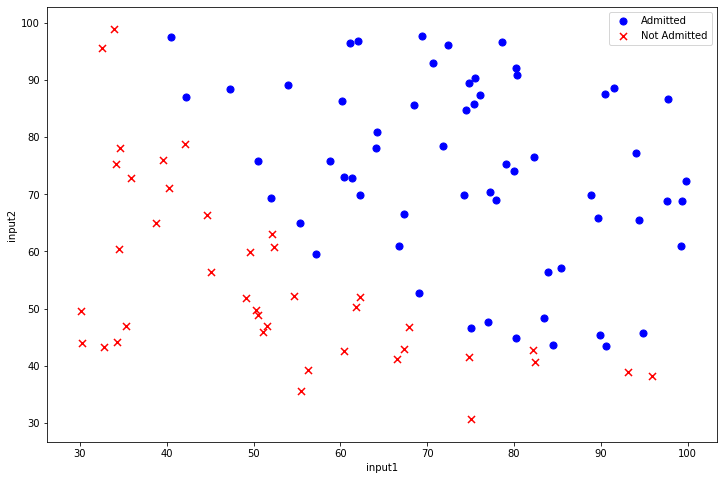

In [3]:
positive = data[data['Output'].isin([1])]
negative = data[data['Output'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Input1'], positive['Input2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Input1'], negative['Input2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('input1')
ax.set_ylabel('input2')

In [4]:
# data.plot(kind='scatter', x='Input', y='Output', figsize=(12,8))
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [5]:
def computeCost(X, y, theta):
    pos = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    neg = np.multiply((1-y), np.log(1 - sigmoid(X * theta.T)))
    inner = pos - neg
    return np.sum(inner)/ (len(X))

In [6]:
data.insert(0, "Ones", 1)
data.head()

,Ones,Input1,Input2,Output
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [7]:
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [8]:
X = np.matrix(X.values)
Y = np.matrix(y.values)
theta = np.matrix(np.zeros(3))
print(X.shape, y.shape, theta.shape)

(100, 3) (100, 1) (1, 3)


In [9]:
computeCost(X, y, theta)

Output    0.693147
dtype: float64

In [10]:
def gradientDescent(X, y, theta, alpha, iter_count):
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iter_count)
    parameters = int(theta.ravel().shape[1])
    for i in range(iter_count):
        error = sigmoid(X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:, j])
            temp[0, j] = theta[0, j] - ((alpha/len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [11]:
iter_count = 200000
alpha = 0.001
g, cost = gradientDescent(X, y, theta, alpha, iter_count)
print(g)

[[-7.45017822  0.06550395  0.05898701]]


In [12]:
computeCost(X, y, g)

Output    0.316554
dtype: float64

Text(0.5, 1.0, 'Logistic Regression Prediction')

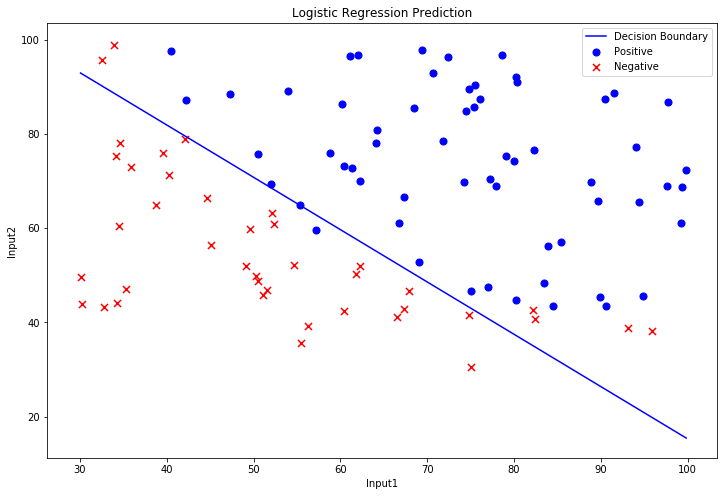

In [15]:
x1 = np.linspace(data.Input1.min(), data.Input1.max(),100)
x2 = np.linspace(data.Input2.min(), data.Input2.max(),100)
h = -(g[0, 0] + (g[0, 1] * x1))/(g[0, 2])
positive = data[data['Output'].isin([1])]
negative = data[data['Output'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
# ax.scatter(data.Input1, data.Input2, label='Training Data')
ax.scatter(positive['Input1'], positive['Input2'], s=50, c='b', marker='o', label='Positive')
ax.scatter(negative['Input1'], negative['Input2'], s=50, c='r', marker='x', label='Negative')
# ax.plot(x1, x2, 'r', label='Prediction')
ax.plot(x1, h, 'b', label='Decision Boundary')

ax.legend(loc=1)
ax.set_xlabel("Input1")
ax.set_ylabel("Input2")
ax.set_title("Logistic Regression Prediction")

Text(0.5, 1.0, 'Cost Function Descent')

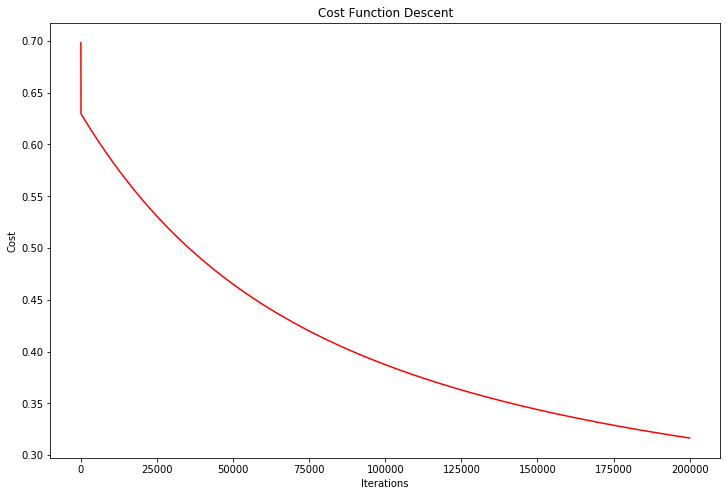

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(iter_count), cost, "r")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Cost Function Descent")

In [1]:
def predict(X, theta):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [ ]:
g = np.matrix(g)
predictions = predict(X, g)
# print(predictions, y)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
# accuracy = (sum(map(int, correct)) % len(correct))
accuracy = (sum(correct) % len(correct))
print(f'accuracy = {accuracy}%')